In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks
import math

In [2]:
datafile = 'Daily Performance Worksheet - April 2024 - truecode-metrics.csv'

SYMBOLS = [ 'Strategy', 'Bitcoin', 'SPY', 'QQQ']

SYMBOL_COLORS = {
    'Strategy': '#CAB145',
    'Bitcoin': '#567DC5', 
    'SPY': '#dddddd', 
    'QQQ': '#C0C0C0', 
}

SYMBOL_LINEWIDTH = {
    'Strategy': '4',
}


SYMBOLS, SYMBOL_COLORS, SYMBOL_LINEWIDTH


(['Strategy', 'Bitcoin', 'SPY', 'QQQ'],
 {'Strategy': '#CAB145',
  'Bitcoin': '#567DC5',
  'SPY': '#dddddd',
  'QQQ': '#C0C0C0'},
 {'Strategy': '4'})

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2024-04-30')

In [4]:
# BITCOIN-FUND is Bitcoin metrics over the same time period as the Fund
# BITCOIN-ALL is Bitcoin metrics over the same time period as the combined Fund and Family Office Account
PITCH_DECK_METRICS = {
#     'FUND': {},
    'ALL': {},
#     'BITCOIN-FUND': {},
    'BITCOIN-ALL': {},
    'SPY': {},
    'QQQ': {},
}

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [5]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/Library/Fonts/Microsoft/Times New Roman Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf',
 '/Library/Fonts/Microsoft/Wingdings 2.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf',
 '/Library/Fonts/OCRAStd.otf',
 '/Library/Fonts/Cascade-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf',
 '/System/Library/Fonts/AquaKana.ttc',
 '/Library/Fonts/MinionPro-Semibold.otf',
 '/Library/Fonts/AGaramondPro-Bold.otf',
 '/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf',
 '/Library/Fonts/Microsoft/SimSun.ttf',
 '/Library/Fonts/HeyBaby-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf',
 '/Library/Fonts/Microsoft/Constantia.ttf',
 '/Library/Fonts/CooperBlackStd-Italic.otf',
 '/System/Library/Fonts/SFCompactItalic.ttf',
 '/Library/Fonts/Anemone-Re

In [6]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

# Configure Charts

In [7]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 2,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [8]:
def calculate_beta(corr, vol, benchmark_vol):
    beta = corr * vol / benchmark_vol
    return beta

In [9]:
# https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/alpha/
def calculate_alpha(portfolio_return, beta, benchmark_return, risk_free_rate=0.04):
    alpha = portfolio_return - risk_free_rate - beta * (benchmark_return - risk_free_rate)
    return alpha

In [10]:
prices = pd.read_csv(datafile)
print(prices)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

            Date    Strategy     Bitcoin         SPY         QQQ
0     12/19/2019 10,000.0000 10,000.0000 10,000.0000 10,000.0000
1     12/20/2019 10,036.1900 10,052.4900  9,994.7000 10,040.3100
2     12/21/2019  9,981.8100  9,975.4600  9,994.7000 10,040.3100
3     12/22/2019 10,342.4300 10,491.0800  9,994.7000 10,040.3100
4     12/23/2019 10,163.9500 10,233.2600 10,009.9700 10,045.0500
...          ...         ...         ...         ...         ...
1590   4/26/2024 79,786.2100 90,479.7300 15,838.5800 20,440.1000
1591   4/27/2024 79,784.2600 90,024.9500 15,838.5800 20,440.1000
1592   4/28/2024 79,782.3200 89,580.5700 15,838.5800 20,440.1000
1593   4/29/2024 79,510.4100 90,625.1600 15,894.6700 20,523.1000
1594   4/30/2024 77,903.3400 86,050.6000 15,642.8800 20,136.1100

[1595 rows x 5 columns]


In [11]:
prices[['Strategy', 'Bitcoin', 'SPY', 'QQQ']]

,Strategy,Bitcoin,SPY,QQQ
Date,,,,
2019-12-19,"10,000.0000","10,000.0000","10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900","9,994.7000","10,040.3100"
2019-12-21,"9,981.8100","9,975.4600","9,994.7000","10,040.3100"
2019-12-22,"10,342.4300","10,491.0800","9,994.7000","10,040.3100"
2019-12-23,"10,163.9500","10,233.2600","10,009.9700","10,045.0500"
...,...,...,...,...
2024-04-26,"79,786.2100","90,479.7300","15,838.5800","20,440.1000"
2024-04-27,"79,784.2600","90,024.9500","15,838.5800","20,440.1000"
2024-04-28,"79,782.3200","89,580.5700","15,838.5800","20,440.1000"


# Fund Statistics

In [12]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[SYMBOLS].calc_stats()

# PITCH_DECK_METRICS['FUND']['Month to Date'] = stats['Strategy'].mtd
# PITCH_DECK_METRICS['BITCOIN-FUND']['Month to Date'] = stats['Bitcoin'].mtd
# PITCH_DECK_METRICS['SPY']['Month to Date'] = stats['SPY'].mtd
# PITCH_DECK_METRICS['QQQ']['Month to Date'] = stats['QQQ'].mtd

# PITCH_DECK_METRICS['FUND']['Year to Date'] = stats['Strategy'].ytd
# PITCH_DECK_METRICS['BITCOIN-FUND']['Year to Date'] = stats['Bitcoin'].ytd
# PITCH_DECK_METRICS['SPY']['Year to Date'] = stats['SPY'].ytd
# PITCH_DECK_METRICS['QQQ']['Year to Date'] = stats['QQQ'].ytd

# PITCH_DECK_METRICS['FUND']['CAGR'] = stats['Strategy'].cagr
# PITCH_DECK_METRICS['BITCOIN-FUND']['CAGR'] = stats['Bitcoin'].cagr

stats.display()

Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2022-05-01  2022-05-01  2022-05-01  2022-05-01
End                  2024-04-30  2024-04-30  2024-04-30  2024-04-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         59.17%      63.51%      21.84%      35.54%
Daily Sharpe         0.69        0.60        0.53        0.64
Daily Sortino        1.13        0.97        0.85        1.03
CAGR                 26.18%      27.89%      10.39%      16.44%
Max Drawdown         -32.35%     -59.64%     -17.02%     -21.91%
Calmar Ratio         0.81        0.47        0.61        0.75

MTD                  -14.99%     -14.96%     -4.03%      -4.37%
3m                   25.29%      41.16%      2.26%       -0.17%
6m                   51.90%      75.82%      20.79%      21.59%
YTD                  17.41%      43.35%      5.61%       3.68%
1Y                   37.35%      107

/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

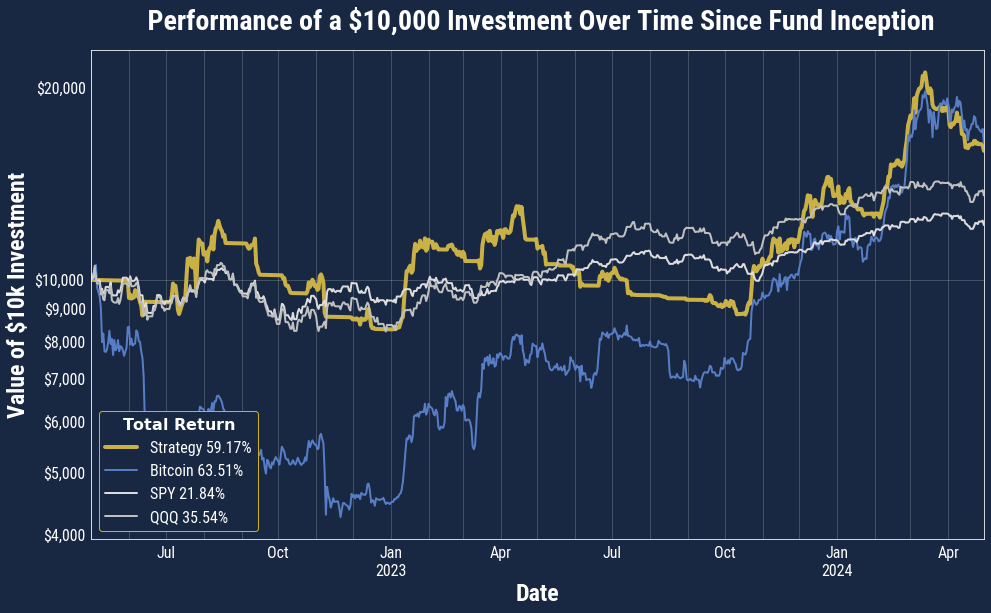

In [13]:
ax = sample[SYMBOLS].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))



# Combined Family Office Account + Fund History Statistics (ALL)

In [14]:
stats = prices[SYMBOLS].calc_stats()
# print(dir(stats['Strategy']))

PITCH_DECK_METRICS['ALL']['Total Return'] = stats['Strategy'].total_return
PITCH_DECK_METRICS['BITCOIN-ALL']['Total Return'] = stats['Bitcoin'].total_return
PITCH_DECK_METRICS['SPY']['Total Return'] = stats['SPY'].total_return
PITCH_DECK_METRICS['QQQ']['Total Return'] = stats['QQQ'].total_return

PITCH_DECK_METRICS['ALL']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-ALL']['CAGR'] = stats['Bitcoin'].cagr
PITCH_DECK_METRICS['SPY']['CAGR'] = stats['SPY'].cagr
PITCH_DECK_METRICS['QQQ']['CAGR'] = stats['QQQ'].cagr

PITCH_DECK_METRICS['ALL']['3MOS'] = stats['Strategy'].three_month
PITCH_DECK_METRICS['BITCOIN-ALL']['3MOS'] = stats['Bitcoin'].three_month
PITCH_DECK_METRICS['SPY']['3MOS'] = stats['SPY'].three_month
PITCH_DECK_METRICS['QQQ']['3MOS'] = stats['QQQ'].three_month

PITCH_DECK_METRICS['ALL']['6MOS'] = stats['Strategy'].six_month
PITCH_DECK_METRICS['BITCOIN-ALL']['6MOS'] = stats['Bitcoin'].six_month
PITCH_DECK_METRICS['SPY']['6MOS'] = stats['SPY'].six_month
PITCH_DECK_METRICS['QQQ']['6MOS'] = stats['QQQ'].six_month

PITCH_DECK_METRICS['ALL']['MTD'] = stats['Strategy'].mtd
PITCH_DECK_METRICS['BITCOIN-ALL']['MTD'] = stats['Bitcoin'].mtd
PITCH_DECK_METRICS['SPY']['MTD'] = stats['SPY'].mtd
PITCH_DECK_METRICS['QQQ']['MTD'] = stats['QQQ'].mtd

PITCH_DECK_METRICS['ALL']['YTD'] = stats['Strategy'].ytd
PITCH_DECK_METRICS['BITCOIN-ALL']['YTD'] = stats['Bitcoin'].ytd
PITCH_DECK_METRICS['SPY']['YTD'] = stats['SPY'].ytd
PITCH_DECK_METRICS['QQQ']['YTD'] = stats['QQQ'].ytd


# Risk metrics
PITCH_DECK_METRICS['ALL']['Volatility'] = stats['Strategy'].yearly_vol
PITCH_DECK_METRICS['BITCOIN-ALL']['Volatility'] = stats['Bitcoin'].yearly_vol
PITCH_DECK_METRICS['SPY']['Volatility'] = stats['SPY'].yearly_vol
PITCH_DECK_METRICS['QQQ']['Volatility'] = stats['QQQ'].yearly_vol

PITCH_DECK_METRICS['ALL']['Max Drawdown'] = stats['Strategy'].max_drawdown
PITCH_DECK_METRICS['BITCOIN-ALL']['Max Drawdown'] = stats['Bitcoin'].max_drawdown
PITCH_DECK_METRICS['SPY']['Max Drawdown'] = stats['SPY'].max_drawdown
PITCH_DECK_METRICS['QQQ']['Max Drawdown'] = stats['QQQ'].max_drawdown

PITCH_DECK_METRICS['ALL']['Sharpe'] = stats['Strategy'].daily_sharpe
PITCH_DECK_METRICS['BITCOIN-ALL']['Sharpe'] = stats['Bitcoin'].daily_sharpe
PITCH_DECK_METRICS['SPY']['Sharpe'] = stats['SPY'].daily_sharpe
PITCH_DECK_METRICS['QQQ']['Sharpe'] = stats['QQQ'].daily_sharpe

PITCH_DECK_METRICS['ALL']['Sortino'] = stats['Strategy'].daily_sortino
PITCH_DECK_METRICS['BITCOIN-ALL']['Sortino'] = stats['Bitcoin'].daily_sortino
PITCH_DECK_METRICS['SPY']['Sortino'] = stats['SPY'].daily_sortino
PITCH_DECK_METRICS['QQQ']['Sortino'] = stats['QQQ'].daily_sortino

PITCH_DECK_METRICS['ALL']['Calmar'] = stats['Strategy'].calmar
PITCH_DECK_METRICS['BITCOIN-ALL']['Calmar'] = stats['Bitcoin'].calmar
PITCH_DECK_METRICS['SPY']['Calmar'] = stats['SPY'].calmar
PITCH_DECK_METRICS['QQQ']['Calmar'] = stats['QQQ'].calmar

stats.display()


Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2019-12-19  2019-12-19  2019-12-19  2019-12-19
End                  2024-04-30  2024-04-30  2024-04-30  2024-04-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         679.03%     760.51%     56.43%      101.36%
Daily Sharpe         1.14        0.90        0.48        0.61
Daily Sortino        1.93        1.45        0.72        0.94
CAGR                 60.06%      63.75%      10.80%      17.40%
Max Drawdown         -32.35%     -76.28%     -34.10%     -35.62%
Calmar Ratio         1.86        0.84        0.32        0.49

MTD                  -14.99%     -14.96%     -4.03%      -4.37%
3m                   25.29%      41.16%      2.26%       -0.17%
6m                   51.90%      75.82%      20.79%      21.59%
YTD                  17.41%      43.35%      5.61%       3.68%
1Y                   37.35%      10

/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

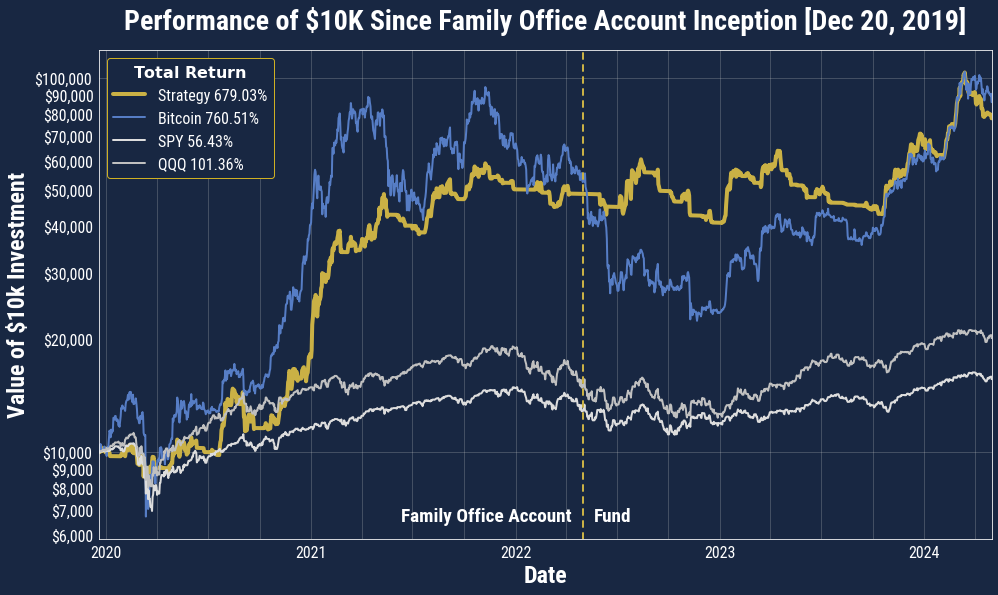

<Figure size 1152x648 with 0 Axes>

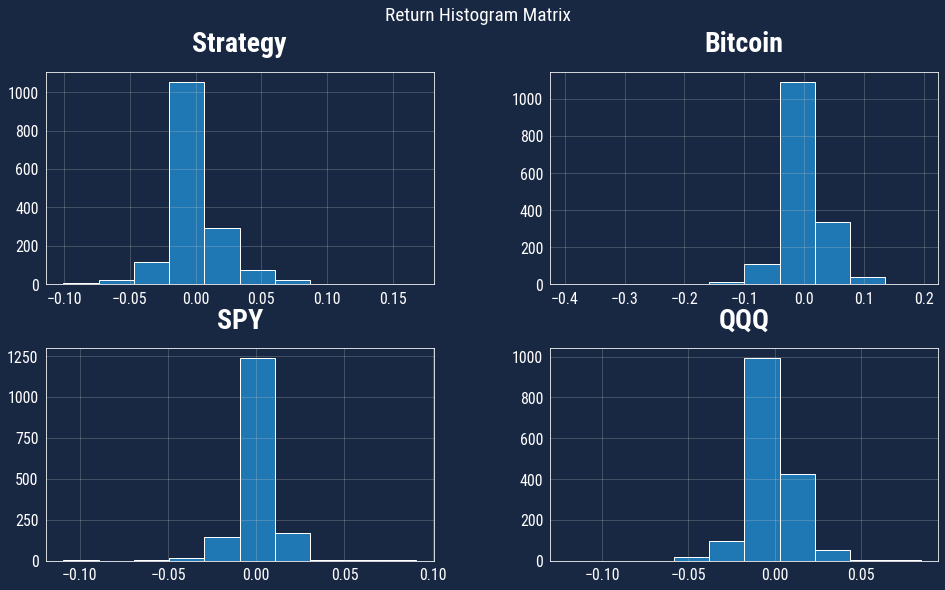

In [15]:
ax = prices[SYMBOLS].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = prices[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='upper left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))

/Users/jmp/code/truecode_metrics/graph-returns-strategy.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

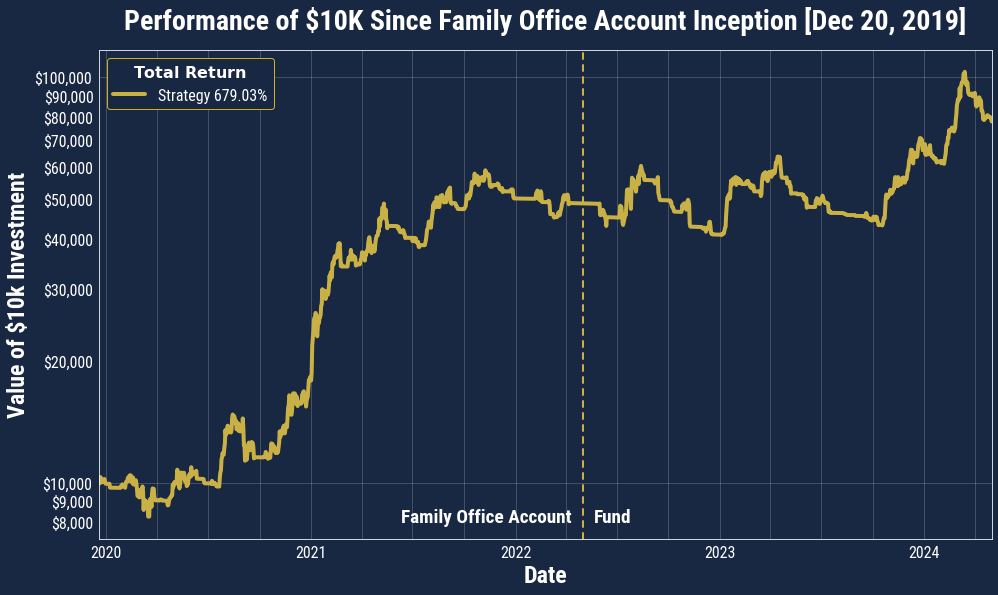

<Figure size 1152x648 with 0 Axes>

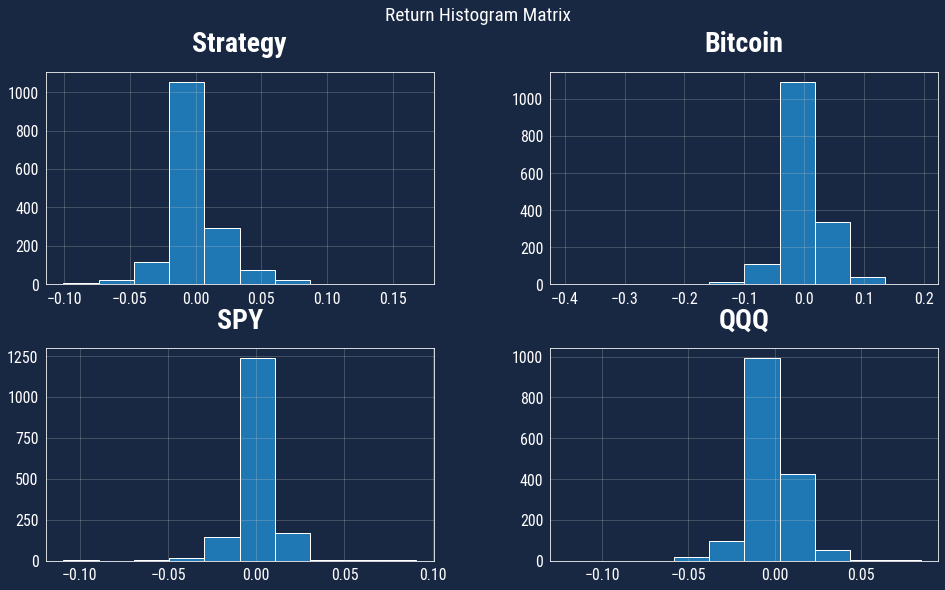

In [16]:
ax = prices[['Strategy']].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = prices[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='upper left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 8000,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 8000,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-strategy.pdf', format='pdf')
ax.get_figure().savefig('graph-returns-strategy.png', format='png')
display(FileLink('graph-returns-strategy.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

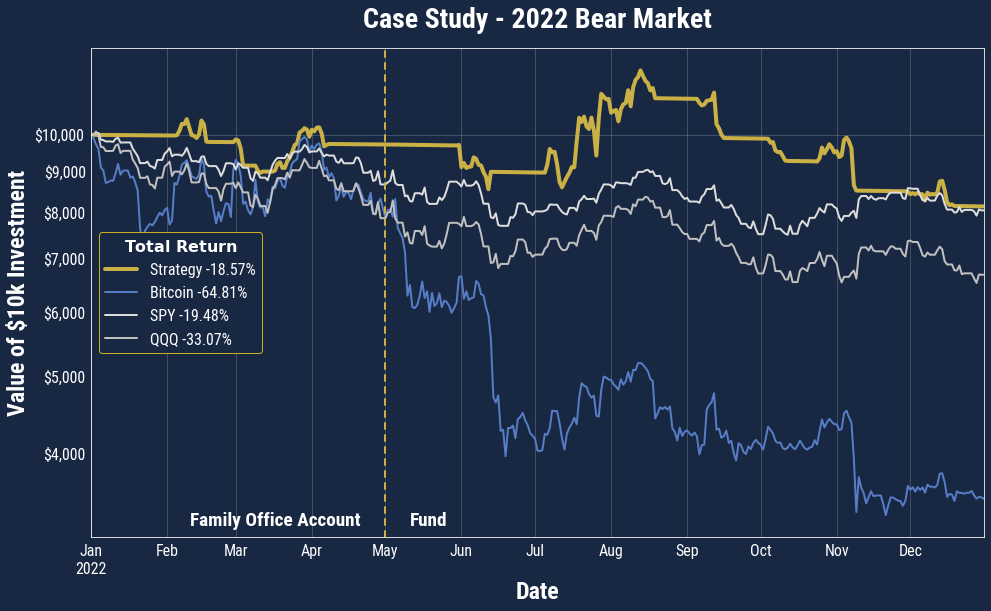

In [17]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[SYMBOLS], value=10000)
ax = rebased_sample[SYMBOLS].plot.line(title='Case Study - 2022 Bear Market', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = rebased_sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='center left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

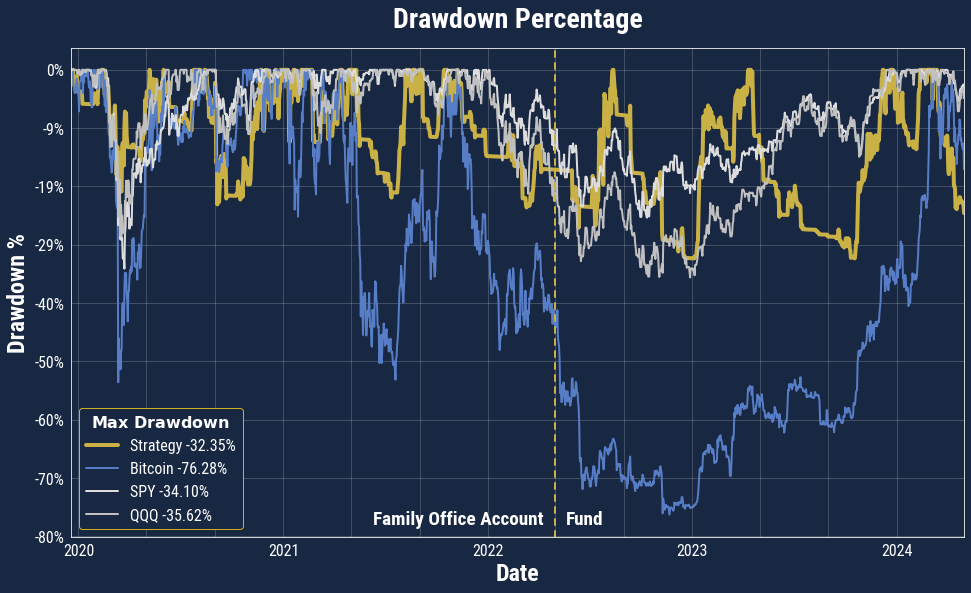

In [18]:
rebased_sample = ffn.rebase(prices[SYMBOLS], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color=SYMBOL_COLORS)
rebased_drawdown_stats = rebased_sample[SYMBOLS].calc_stats()

# rebased_drawdown_stats.display()
for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

max_drawdowns = {}
for symbol in SYMBOLS:
    max_drawdowns[symbol] = rebased_drawdown_stats[symbol].stats['max_drawdown']

ax.legend(
    (
        'Strategy {:.2f}%'.format(max_drawdowns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(max_drawdowns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(max_drawdowns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(max_drawdowns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [19]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19       NaN
2019-12-20       NaN
2019-12-21       NaN
2019-12-22       NaN
2019-12-23       NaN
               ...  
2024-04-26       NaN
2024-04-27       NaN
2024-04-28       NaN
2024-04-29       NaN
2024-04-30   -0.1499
Name: Strategy, Length: 1595, dtype: float64

# Calculate VaR

Bitcoin VaR = 0.05200247488439904
Strategy VaR = 0.031247664846836016
SPY VaR = 0.016130458118506746


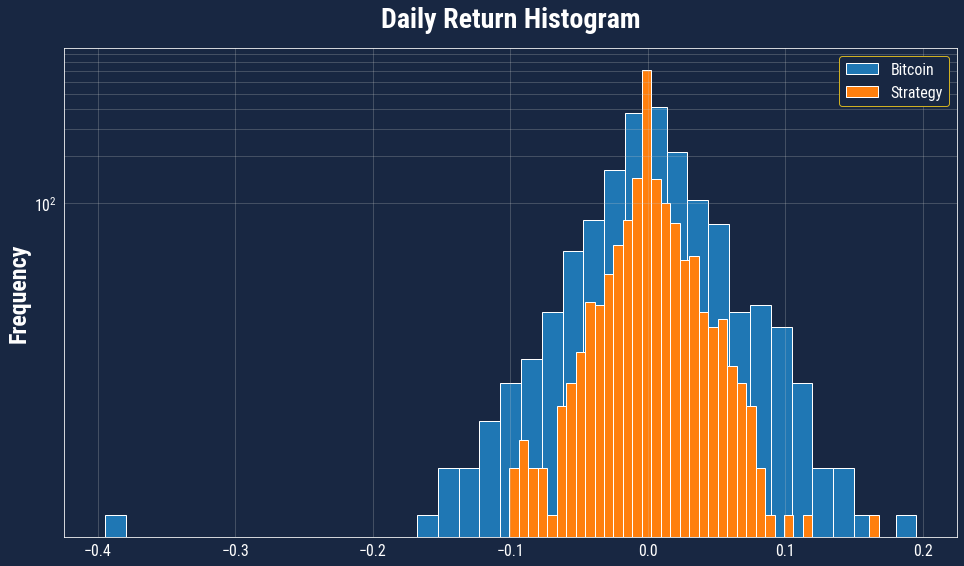

In [20]:
bitcoin_daily_returns = prices['Bitcoin'].pct_change(freq="D")
strategy_daily_returns = prices['Strategy'].pct_change(freq="D")
spy_daily_returns = prices['SPY'].pct_change(freq="D")

VaR_95_bitcoin = abs(bitcoin_daily_returns.quantile(0.05))
VaR_95_strategy = abs(strategy_daily_returns.quantile(0.05))
VaR_95_spy = abs(spy_daily_returns.quantile(0.05))

print('Bitcoin VaR =', VaR_95_bitcoin)
print('Strategy VaR =', VaR_95_strategy)
print('SPY VaR =', VaR_95_spy)

ax = bitcoin_daily_returns.plot(kind='hist', logy=True, legend=True, title='Daily Return Histogram', bins=int(math.sqrt(len(bitcoin_daily_returns))))
strategy_daily_returns.plot(kind='hist', logy=True, legend=True, bins=int(math.sqrt(len(strategy_daily_returns))))

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

PITCH_DECK_METRICS['ALL']['VaR (95%)'] = VaR_95_strategy
PITCH_DECK_METRICS['BITCOIN-ALL']['VaR (95%)'] = VaR_95_bitcoin
PITCH_DECK_METRICS['SPY']['VaR (95%)'] = VaR_95_spy


# Calculate Correlation

In [21]:
corr = prices[['Strategy', 'Bitcoin', 'SPY', 'QQQ']].corr()
corr

,Strategy,Bitcoin,SPY,QQQ
Strategy,1.0000,0.7330,0.8905,0.8042
Bitcoin,0.7330,1.0000,0.8229,0.8363
SPY,0.8905,0.8229,1.0000,0.9618
QQQ,0.8042,0.8363,0.9618,1.0000


In [22]:
corr_bitcoin_strategy = corr_strategy_bitcoin = corr[['Strategy']].loc['Bitcoin'].iloc[0]
corr_spy_strategy = corr_strategy_spy = corr[['Strategy']].loc['SPY'].iloc[0]
corr_bitcoin_spy = corr_spy_bitcoin = corr[['SPY']].loc['Bitcoin'].iloc[0]
PITCH_DECK_METRICS['ALL']['Correlation to BTC'] = corr_bitcoin_strategy
PITCH_DECK_METRICS['ALL']['Correlation to SPY'] = corr_spy_strategy
PITCH_DECK_METRICS['SPY']['Correlation to BTC'] = corr_bitcoin_spy
PITCH_DECK_METRICS['BITCOIN-ALL']['Correlation to BTC'] = 1.0
PITCH_DECK_METRICS['SPY']['Correlation to SPY'] = 1.0
print("Strategy Correlation(Bitcoin) = {:.4}".format(corr_strategy_bitcoin))
print("Strategy Correlation(SPY) = {:.4}".format(corr_spy_strategy))
print("SPY Correlation(Bitcoin) = {:.4}".format(corr_bitcoin_spy))

Strategy Correlation(Bitcoin) = 0.733
Strategy Correlation(SPY) = 0.8905
SPY Correlation(Bitcoin) = 0.8229


# Calculate Volatility

In [23]:
treasury_10y = .0459
strategy_vol = stats['Strategy'].stats['yearly_vol']
bitcoin_vol = stats['Bitcoin'].stats['yearly_vol']
spy_vol = stats['SPY'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(bitcoin_vol))
print("SPY Volatility = {:.4}".format(spy_vol))

Strategy Volatility = 0.7522
Bitcoin Volatility = 1.374
SPY Volatility = 0.1883


# Set baselines for Alpha, Beta

In [24]:
PITCH_DECK_METRICS['SPY']['Beta (SPY)'] = 1.0
PITCH_DECK_METRICS['SPY']['Alpha (SPY)'] = 0.0
PITCH_DECK_METRICS['BITCOIN-ALL']['Beta (Bitcoin)'] = 1.0
PITCH_DECK_METRICS['BITCOIN-ALL']['Alpha (Bitcoin)'] = 0.0
treasury_10y = .0459

# Calculate Strategy Beta & Alpha wrt Bitcoin

In [25]:
beta_strategy_bitcoin = calculate_beta(corr_strategy_bitcoin, strategy_vol, bitcoin_vol)
alpha_bitcoin = calculate_alpha(PITCH_DECK_METRICS['ALL']['CAGR'], beta_strategy_bitcoin, PITCH_DECK_METRICS['BITCOIN-ALL']['CAGR'])

PITCH_DECK_METRICS['ALL']['Beta (Bitcoin)'] = beta_strategy_bitcoin
PITCH_DECK_METRICS['ALL']['Alpha (Bitcoin)'] = alpha_bitcoin
print("Strategy Beta (Bitcoin) = {:.4}".format(beta_strategy_bitcoin))
print('Alpha(Bitcoin) = {:.2f}%'.format(alpha_bitcoin * 100.))

Strategy Beta (Bitcoin) = 0.4013
Alpha(Bitcoin) = 32.08%


# Calculate Strategy Beta & Alpha wrt SPY

In [26]:
beta_strategy_spy = calculate_beta(corr_strategy_spy, strategy_vol, spy_vol)
alpha_strategy_spy = calculate_alpha(PITCH_DECK_METRICS['ALL']['CAGR'], beta_strategy_spy, PITCH_DECK_METRICS['SPY']['CAGR'])
PITCH_DECK_METRICS['ALL']['Beta (SPY)'] = beta_strategy_spy
PITCH_DECK_METRICS['ALL']['Alpha (SPY)'] = alpha_strategy_spy

print("Strategy Beta (SPY) = {:.4}".format(beta_strategy_spy))
print('Strategy Alpha (SPY) = {:.2f}%'.format(alpha_strategy_spy * 100.))

Strategy Beta (SPY) = 3.558
Strategy Alpha (SPY) = 31.88%


# Calculate SPY Beta & Alpha wrt Bitcoin

In [27]:
beta_spy_btc = calculate_beta(corr_bitcoin_spy, spy_vol, bitcoin_vol)
alpha_spy_btc = calculate_alpha(PITCH_DECK_METRICS['SPY']['CAGR'], beta_spy_btc, PITCH_DECK_METRICS['BITCOIN-ALL']['CAGR'])
PITCH_DECK_METRICS['SPY']['Beta (Bitcoin)'] = beta_spy_btc
PITCH_DECK_METRICS['SPY']['Alpha (Bitcoin)'] = alpha_spy_btc

print("SPY Beta(BTC) = {:.4}".format(beta_spy_btc))
print('SPY Alpha(BTC) = {:.2f}%'.format(alpha_spy_btc * 100.))

SPY Beta(BTC) = 0.1128
SPY Alpha(BTC) = 0.06%


# Calculate BTC Beta & Alpha wrt SPY

In [28]:
beta_btc_spy = calculate_beta(corr_bitcoin_spy, bitcoin_vol, spy_vol)
alpha_btc_spy = calculate_alpha(PITCH_DECK_METRICS['BITCOIN-ALL']['CAGR'], beta_btc_spy, PITCH_DECK_METRICS['SPY']['CAGR'])

PITCH_DECK_METRICS['BITCOIN-ALL']['Beta (SPY)'] = beta_btc_spy
PITCH_DECK_METRICS['BITCOIN-ALL']['Alpha (SPY)'] = alpha_btc_spy

print("Bitcoin Beta(SPY) = {:.4}".format(beta_btc_spy))
print('Bitcoin Alpha(SPY) = {:.2f}%'.format(alpha_btc_spy * 100.))

Bitcoin Beta(SPY) = 6.005
Bitcoin Alpha(SPY) = 18.94%


# Dump Metrics to Centralized File

In [29]:
pdmdf = pd.DataFrame(PITCH_DECK_METRICS)
pdmdf.transpose().to_csv('pitch_deck_metrics.csv')
pdmdf.transpose()

,Total Return,CAGR,3MOS,6MOS,MTD,YTD,Volatility,Max Drawdown,Sharpe,Sortino,Calmar,VaR (95%),Correlation to BTC,Correlation to SPY,Beta (Bitcoin),Alpha (Bitcoin),Beta (SPY),Alpha (SPY)
ALL,6.7903,0.6006,0.2529,0.5190,-0.1499,0.1741,0.7522,-0.3235,1.1381,1.9306,1.8569,0.0312,0.7330,0.8905,0.4013,0.3208,3.5576,0.3188
BITCOIN-ALL,7.6051,0.6375,0.4116,0.7582,-0.1496,0.4335,1.3739,-0.7628,0.8977,1.4525,0.8358,0.0520,1.0000,NaN,1.0000,0.0000,6.0045,0.1894
SPY,0.5643,0.1080,0.0226,0.2079,-0.0403,0.0561,0.1883,-0.3410,0.4795,0.7164,0.3166,0.0161,0.8229,1.0000,0.1128,0.0006,1.0000,0.0000
QQQ,1.0136,0.1740,-0.0017,0.2159,-0.0437,0.0368,0.3546,-0.3562,0.6142,0.9434,0.4884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
